   hour  day_of_week  temperature  rain  congestion_level
0     6            6    23.208954     0         40.886893
1    19            1    29.509317     1         91.748290
2    14            0    20.643766     1         77.691852
3    10            3    23.866253     0         60.761663
4     7            2    21.144567     1         52.491159


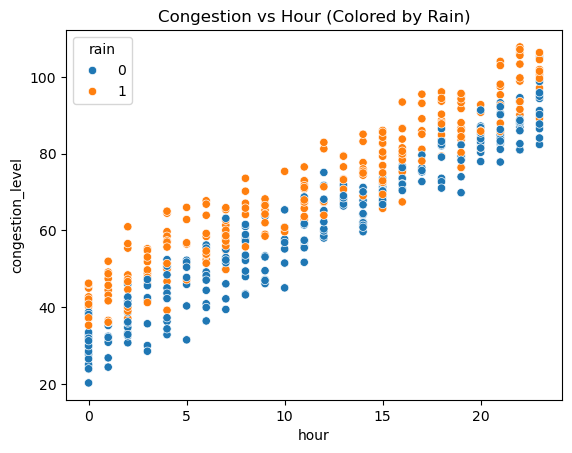


Model coefficients: [ 2.54308454 -0.80314876 -0.0223675  10.19983774]
Intercept: 34.7922072147703
Mean Squared Error: 28.99
R2 Score: 0.92


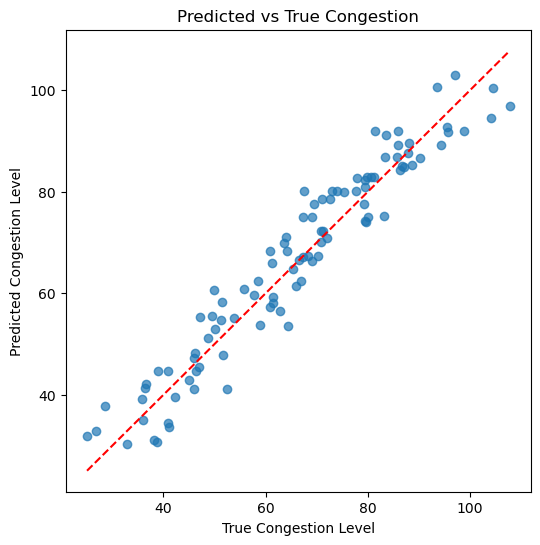


Example input:
   hour  day_of_week  temperature  rain
0    18            4           28     1
Predicted congestion level: 86.93


In [2]:
# Traffic Congestion Predictor - Python code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ---------------------------
# Generate synthetic data
# ---------------------------
np.random.seed(42)

n_samples = 500

# Simulate features
hours = np.random.randint(0, 24, n_samples)                # Hour of day
days = np.random.randint(0, 7, n_samples)                 # Day of week (0=Monday)
temperature = np.random.normal(25, 5, n_samples)         # Temperature in °C
rain = np.random.randint(0, 2, n_samples)                # Rain (0 or 1)

# Generate congestion level (target) with some logic
congestion = (
    30 + 
    2.5 * hours + 
    5 * (np.isin(days, [0, 1, 4])) +  # Higher on Mon, Tue, Fri
    10 * rain + 
    np.random.normal(0, 5, n_samples) # noise
)

df = pd.DataFrame({
    'hour': hours,
    'day_of_week': days,
    'temperature': temperature,
    'rain': rain,
    'congestion_level': congestion
})

print(df.head())

# ---------------------------
# Visualize data
# ---------------------------
sns.scatterplot(x='hour', y='congestion_level', hue='rain', data=df)
plt.title("Congestion vs Hour (Colored by Rain)")
plt.show()

# ---------------------------
# Prepare features and target
# ---------------------------
X = df[['hour', 'day_of_week', 'temperature', 'rain']]
y = df['congestion_level']

# ---------------------------
# Split into train and test
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------
# Train regression model
# ---------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# ---------------------------
# Predict and evaluate
# ---------------------------
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", round(mse, 2))
print("R2 Score:", round(r2, 2))

# ---------------------------
# Plot predictions vs true
# ---------------------------
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("True Congestion Level")
plt.ylabel("Predicted Congestion Level")
plt.title("Predicted vs True Congestion")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# ---------------------------
# Example prediction
# ---------------------------
example = pd.DataFrame({
    'hour': [18],
    'day_of_week': [4],      # Friday
    'temperature': [28],
    'rain': [1]
})

predicted_congestion = model.predict(example)[0]
print("\nExample input:")
print(example)
print(f"Predicted congestion level: {predicted_congestion:.2f}")
